# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
data=pd.read_csv("sample_sales_data.csv", index_col=['Unnamed: 0'])
data.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


- **transaction_id** = this is a unique ID that is assigned to each transaction
- **timestamp** = this is the datetime at which the transaction was made
- **product_id** = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- **category** = this is the category that the product is contained within
- **customer_type** = this is the type of customer that made the transaction
- **unit_price** = the price that 1 unit of this item sells for
- **quantity** = the number of units sold for this product within this transaction
- **total** = the total amount payable by the customer
- **payment_type** = the payment method used by the customer

In [4]:
data.shape

(7829, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 611.6+ KB


# Data Preprocessing

In [6]:
data.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 611.6+ KB


In [9]:
data.drop(["transaction_id","product_id"],axis=1,inplace=True)
data.timestamp=pd.to_datetime(data.timestamp, format='%Y-%m-%d %H:%M:%S')

In [10]:
data.head()

,timestamp,category,customer_type,unit_price,quantity,total,payment_type
0,2022-03-02 09:51:38,fruit,gold,3.99,2,7.98,e-wallet
1,2022-03-06 10:33:59,fruit,standard,3.99,1,3.99,e-wallet
2,2022-03-04 17:20:21,fruit,premium,0.19,2,0.38,e-wallet
3,2022-03-02 17:23:58,fruit,gold,0.19,4,0.76,e-wallet
4,2022-03-05 14:32:43,fruit,basic,4.49,2,8.98,debit card


In [11]:
data['date']=pd.to_datetime(data['timestamp']).dt.date
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month
data['day'] = pd.DatetimeIndex(data['date']).day
data['time']=pd.to_datetime(data['timestamp']).dt.time
data['hour']=pd.to_datetime(data.timestamp).dt.hour

In [12]:
data.timestamp=pd.to_datetime([i.strftime('%Y-%m-%d %H:00:00') for i in data.timestamp], format='%Y-%m-%d %H:%M:%S')

In [13]:
data.dtypes

timestamp        datetime64[ns]
category                 object
customer_type            object
unit_price              float64
quantity                  int64
total                   float64
payment_type             object
date                     object
year                      int64
month                     int64
day                       int64
time                     object
hour                      int64
dtype: object

# EDA

In [14]:
sorted(data.date.unique())

[datetime.date(2022, 3, 1),
 datetime.date(2022, 3, 2),
 datetime.date(2022, 3, 3),
 datetime.date(2022, 3, 4),
 datetime.date(2022, 3, 5),
 datetime.date(2022, 3, 6),
 datetime.date(2022, 3, 7)]

> The data is of 1 outlet and of 1 week from 1st March 2022 to 7th March 2022

In [15]:
sorted(data.hour.unique())

[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

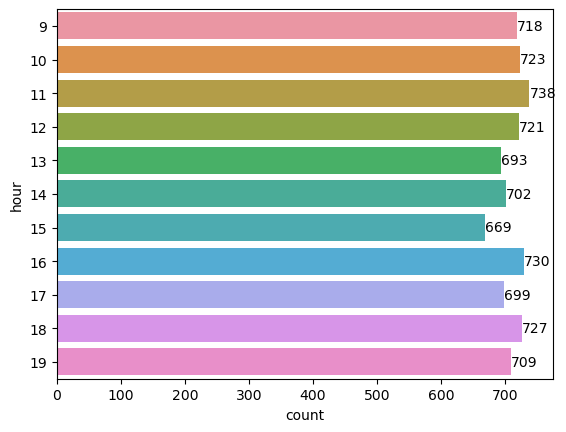

In [16]:
ax=sns.countplot(y=data.hour)
for i in ax.containers:
  ax.bar_label(i)
plt.show()

> Peak hours are at 11hrs.

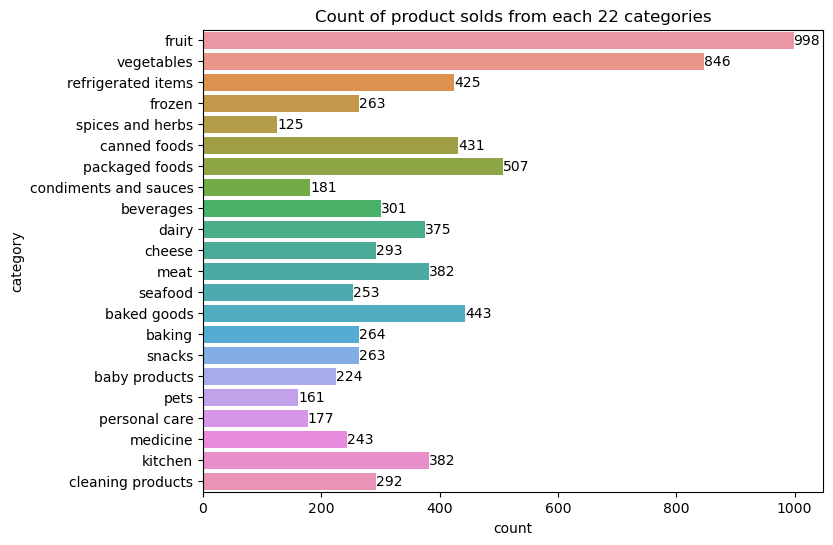

In [17]:
plt.figure(figsize=(8,6))
ax=sns.countplot(y=data.category)
for i in ax.containers:
  ax.bar_label(i)
plt.title(f'Count of product solds from each {len(data.category.unique())} categories')
plt.show()

> There were 22 categories of products among which highest sold ones are from fruits and vegetables category. The least sold ones are from spices and herbs, pets, personal care & condiments and sauces.



<Axes: >

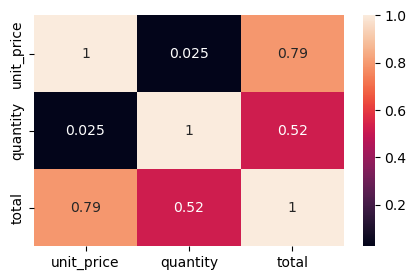

In [18]:
plt.figure(figsize=(5,3))
sns.heatmap(data[['unit_price', 'quantity', 'total']].corr(),annot=True)

> - Unit Price and total are strongly positively correlated that means more unit price is related to more total. 
> - Quantity and total are moderately correlated.  

In [19]:
data.quantity.describe()

count    7829.000000
mean        2.501597
std         1.122722
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: quantity, dtype: float64

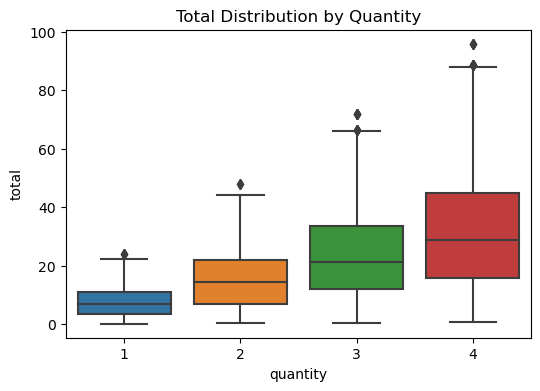

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x='quantity', y='total', data=data)
plt.title("Total Distribution by Quantity")
plt.show()

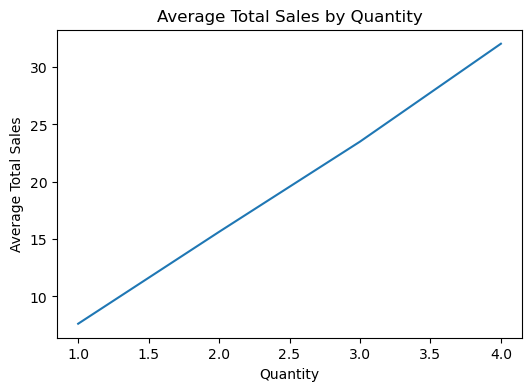

In [21]:
average_sales_by_quantity = data.groupby('quantity')['total'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.lineplot(x='quantity', y='total', data=average_sales_by_quantity)
plt.title("Average Total Sales by Quantity")
plt.xlabel("Quantity")
plt.ylabel("Average Total Sales")
plt.show()

> On an average when quantity increases, the average total sales also increases.

In [22]:
data.unit_price.describe()

count    7829.000000
mean        7.819480
std         5.388088
min         0.190000
25%         3.990000
50%         7.190000
75%        11.190000
max        23.990000
Name: unit_price, dtype: float64

In [23]:
data.category[data.unit_price.max()==data.unit_price].unique()

array(['medicine'], dtype=object)

> The maximum unit price is 23.99 belonging from medicine category

In [24]:
data.category[data.unit_price.min()==data.unit_price].unique()

array(['fruit', 'spices and herbs', 'snacks'], dtype=object)

> The minimum unit price is 0.19 belonging from fruit, spices and herbs & snacks categories.

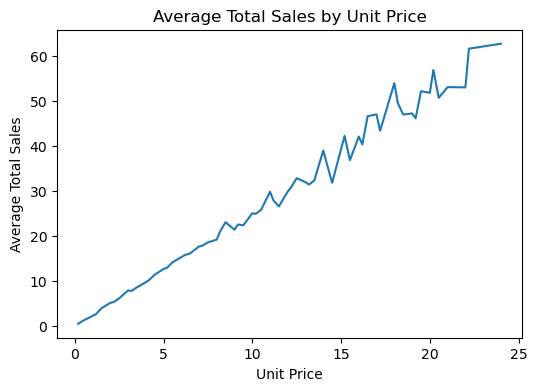

In [25]:
average_sales_by_price = data.groupby('unit_price')['total'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.lineplot(x='unit_price', y='total', data=average_sales_by_price)
plt.title("Average Total Sales by Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Average Total Sales")
plt.show()

> On an average when unit price increases the average total sales also increases.

<Axes: xlabel='unit_price', ylabel='total'>

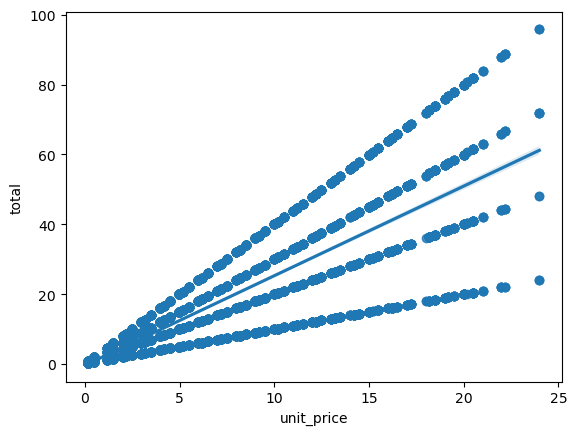

In [26]:
sns.regplot(x=data.unit_price,y=data.total)

> Customers make the maximum purchase when the unit_price is less and then the crowd starts to fall when the unit_price increases.

<Axes: ylabel='Count'>

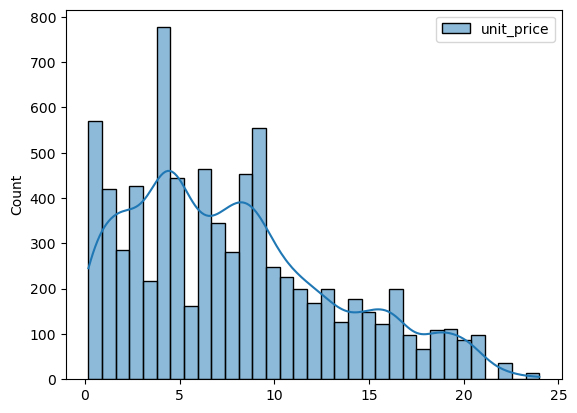

In [27]:
sns.histplot(data=data[['unit_price']],  kde=True)

> Maximum customers tend to purchase items with lower unit_price (roughly 0-10) and the crowd decreases when the unit_price increases(10-25)

<Axes: xlabel='unit_price'>

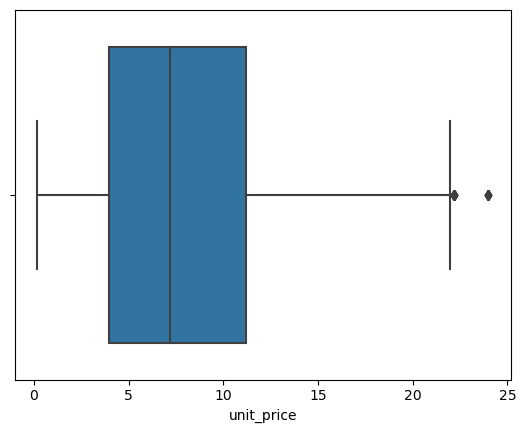

In [28]:
sns.boxplot(x=data.unit_price)

In [29]:
data.unit_price.quantile(0.25)

3.99

In [30]:
data.unit_price.quantile(0.75)

11.19

> The average unit price ranges from 3.99 to 11.19.

In [31]:
data.total.describe()

count    7829.000000
mean       19.709905
std        17.446680
min         0.190000
25%         6.570000
50%        14.970000
75%        28.470000
max        95.960000
Name: total, dtype: float64

<Axes: xlabel='total'>

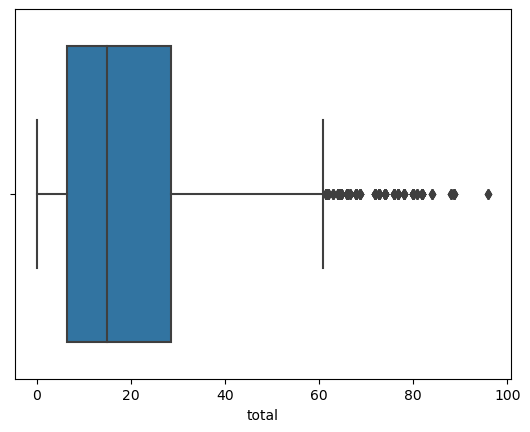

In [32]:
sns.boxplot(x=data.total)

In [33]:
data.total.quantile(0.25)

6.57

In [34]:
data.total.quantile(0.75)

28.47

> The total purchase made by most customers lies between 6.57 to 28.47. 

<Axes: ylabel='Count'>

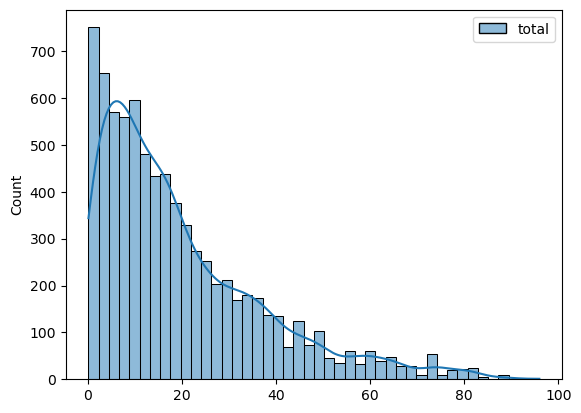

In [35]:
sns.histplot(data=data[['total']],  kde=True)

> With increase in total the count of customers decreases. Eventually, most of the customer's total purchase is less.

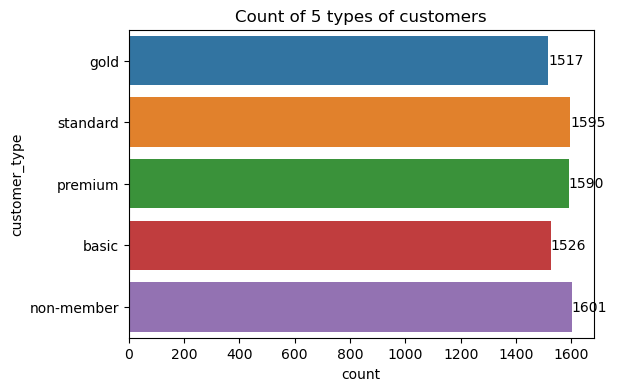

In [36]:
plt.figure(figsize=(6,4))
ax=sns.countplot(y=data.customer_type)
for i in ax.containers:
  ax.bar_label(i)
plt.title(f'Count of {len(data.customer_type.unique())} types of customers')
plt.show()

> The majority of customers are non-members. 

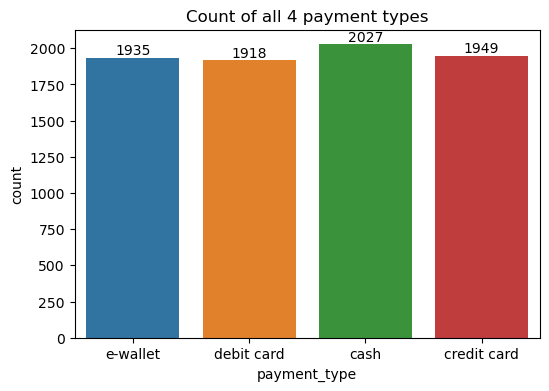

In [37]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x=data.payment_type)
for i in ax.containers:
  ax.bar_label(i)
plt.title(f'Count of all {len(data.payment_type.unique())} payment types')
plt.show()

> The most common method of payment is cash.